In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


K-Means is an unsupervised clustering algorithm that divides the data into K clusters by:

Selecting K random centroids

Assigning each data point to the nearest centroid

Updating the centroids

Repeating until convergence

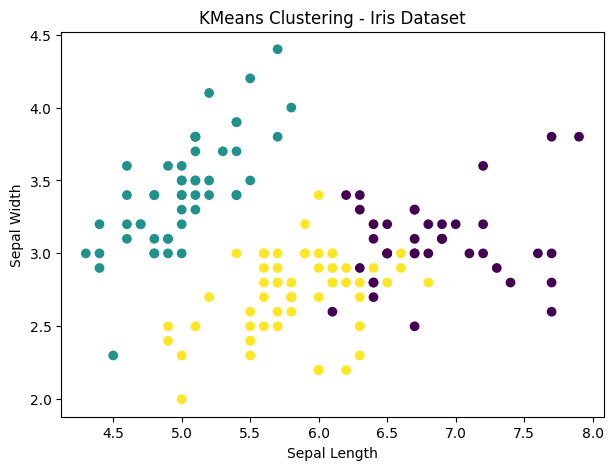

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df)

df['KMeans_Cluster'] = y_kmeans

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y_kmeans)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KMeans Clustering - Iris Dataset")
plt.show()

y_kmeans


Why K-Means is suitable for the Iris dataset?

Iris dataset has continuous numerical features,
Natural groups exist (Setosa, Virginica, Versicolor),
K=3 fits well because dataset originally has 3 species,
K-Means works well when clusters are roughly spherical (approx true for Iris)





Hierarchical clustering builds a tree-like structure (dendrogram).
Agglomerative (bottom-up):
Each point starts as its own cluster → repeatedly merge closest clusters.

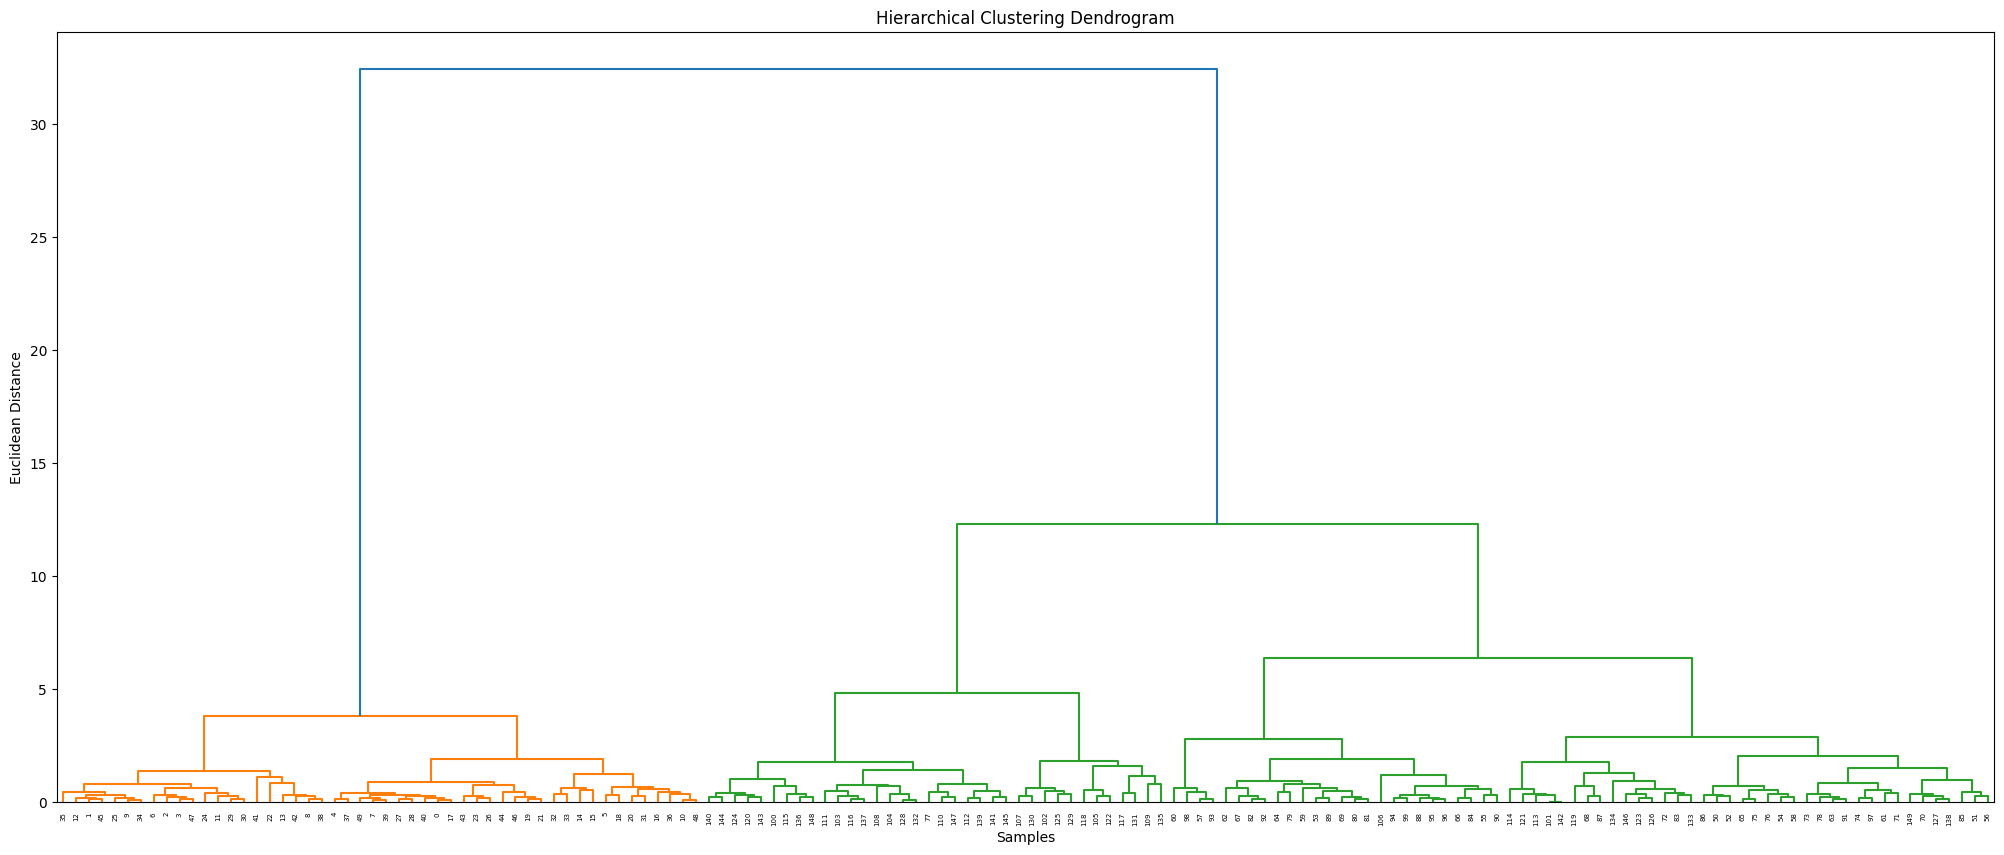

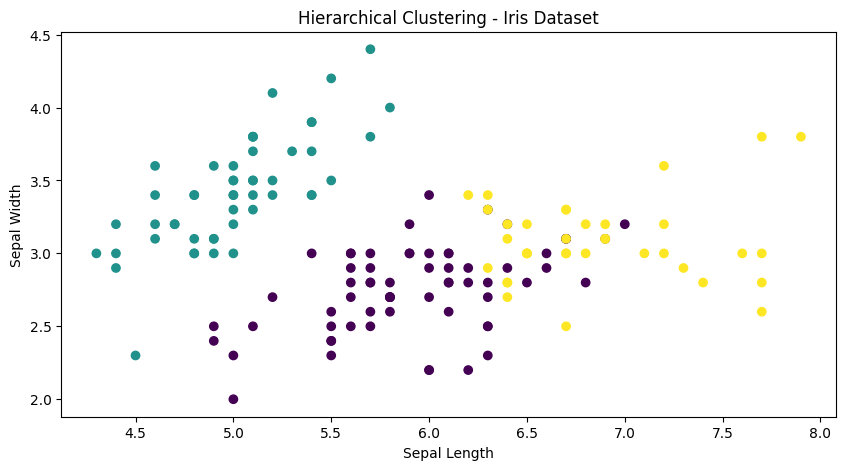

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:

# Dendrogram
plt.figure(figsize=(25,10))
sch.dendrogram(sch.linkage(df.iloc[:,:4], method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(df.iloc[:,:4])

df['HC_Cluster'] = y_hc

# Visualization
plt.figure(figsize=(10,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y_hc)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Hierarchical Clustering - Iris Dataset")
plt.show()

y_hc

Why Hierarchical Clustering is suitable for Iris dataset?
✔It helps visualize relationships between species
✔ Dendrogram shows clear separation
✔ Good for small datasets like Iris (150 samples)
✔ Does not require specifying K beforehand (but you can cut the dendrogram at 3 clusters)